In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gpiosenka/sports-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sports-classification


In [2]:
train_dir = "/kaggle/input/sports-classification/train"
test_dir = "/kaggle/input/sports-classification/test"
val_dir = "/kaggle/input/sports-classification/valid"

import os

class_names = os.listdir(train_dir)
print("classes :",  class_names)

classes : ['bobsled', 'hurdles', 'snow boarding', 'fly fishing', 'luge', 'sidecar racing', 'ampute football', 'volleyball', 'billiards', 'giant slalom', 'tennis', 'horse racing', 'pole dancing', 'figure skating women', 'rollerblade racing', 'fencing', 'olympic wrestling', 'golf', 'ultimate', 'harness racing', 'football', 'frisbee', 'bungee jumping', 'shot put', 'ice climbing', 'figure skating men', 'rowing', 'bike polo', 'swimming', 'judo', 'axe throwing', 'archery', 'baseball', 'wheelchair basketball', 'log rolling', 'lacrosse', 'rock climbing', 'horse jumping', 'hydroplane racing', 'formula 1 racing', 'curling', 'jousting', 'javelin', 'water cycling', 'speed skating', 'barell racing', 'bull riding', 'horseshoe pitching', 'croquet', 'chuckwagon racing', 'hammer throw', 'rugby', 'pole climbing', 'nascar racing', 'snowmobile racing', 'boxing', 'mushing', 'track bicycle', 'canoe slamon', 'disc golf', 'bmx', 'air hockey', 'rings', 'trapeze', 'motorcycle racing', 'tug of war', 'ski jumping

In [3]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
#
# train_datagen = ImageDataGenerator(rescale=1./255, rotation_range = 40, shear_range=0.1, zoom_range=0.1, horizontal_flip=True)
# test_datagen = ImageDataGenerator(rescale=1./255)
# val_datagen = ImageDataGenerator(rescale=1./255)
#
# train_set = train_datagen.flow_from_directory(train_dir, target_size=(224,224), batch_size=8)
# test_set = test_datagen.flow_from_directory(test_dir, target_size=(224,224), batch_size=8, shuffle=False)
# val_set = test_datagen.flow_from_directory(val_dir, target_size=(224,224), batch_size=8, shuffle=False)
import keras

train_dataset = keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=8,
    shuffle=True,
    label_mode="categorical"
)
test_dataset = keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=8,
    shuffle=True,
    label_mode="categorical"
)
val_dataset = keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    batch_size=8,
    shuffle=False,
    label_mode="categorical"
)

Found 13492 files belonging to 100 classes.
Found 500 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


In [4]:
import keras

num_classes = 100
input_shape = (224, 224, 3)

base_model = keras.applications.EfficientNetB0(include_top=False, input_shape=input_shape)
x = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(num_classes, activation='softmax')(x)

model = keras.models.Model(inputs=base_model.input, outputs=output)
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,177,671 (15.94 MB)

 Trainable params: 4,135,648 (15.78 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [5]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=4,
    min_lr=1e-5
)

early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=6,
    restore_best_weights=True
)

In [6]:
import tensorflow as tf

train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [7]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 191s 68ms/step - accuracy: 0.4446 - loss: 2.2895 - val_accuracy: 0.8180 - val_loss: 0.5805 - learning_rate: 0.0010
Epoch 2/20
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 121s 43ms/step - accuracy: 0.7771 - loss: 0.7904 - val_accuracy: 0.8540 - val_loss: 0.4803 - learning_rate: 0.0010
Epoch 3/20
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 72s 43ms/step - accuracy: 0.8352 - loss: 0.5542 - val_accuracy: 0.8660 - val_loss: 0.4328 - learning_rate: 0.0010
Epoch 4/20
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 74s 44ms/step - accuracy: 0.8736 - loss: 0.4234 - val_accuracy: 0.8820 - val_loss: 0.4251 - learning_rate: 0.0010
Epoch 5/20
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 73s 43ms/step - accuracy: 0.8914 - loss: 0.3481 - val_accuracy: 0.8920 - val_loss: 0.4116 - learning_rate: 0.0010
Epoch 6/20
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 74s 44ms/step - accuracy: 0.9097 - loss: 0.2874 - val_accuracy: 0.8620 - val_loss: 0.6351 - learning_rate: 0.0010
Epoch 7/20
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accu

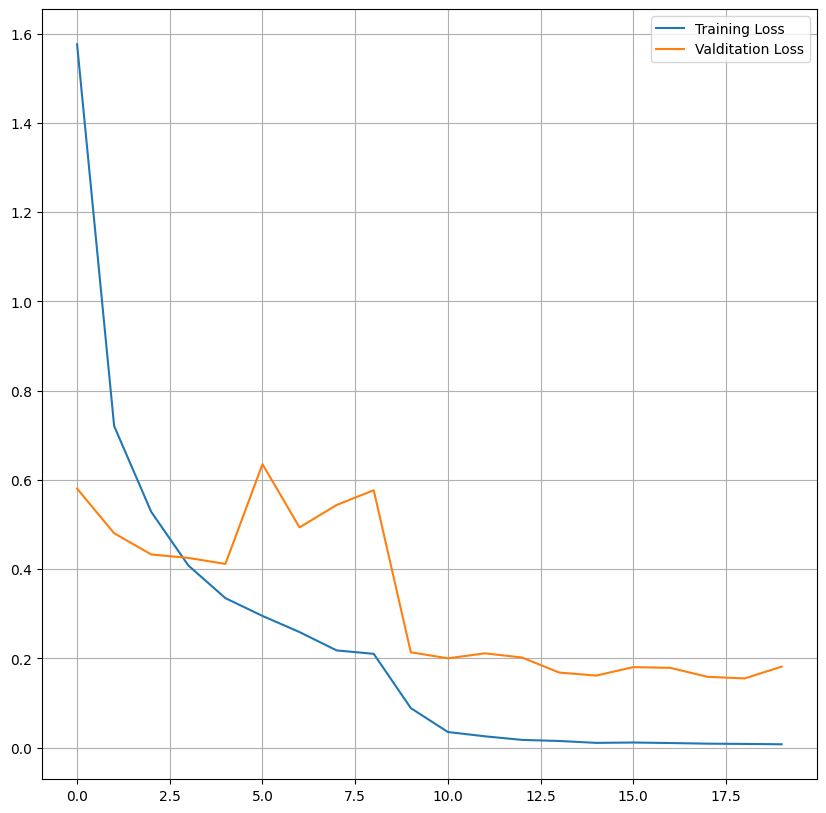

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Valditation Loss')

plt.grid(True)
plt.legend()
plt.show()

In [9]:
model.evaluate(test_dataset)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9739 - loss: 0.1068


[0.08156684041023254, 0.972000002861023]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


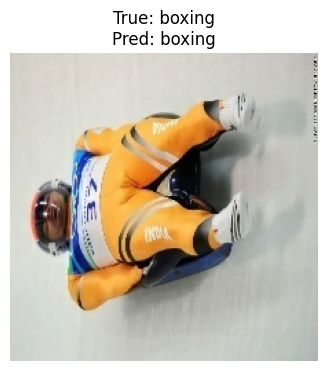

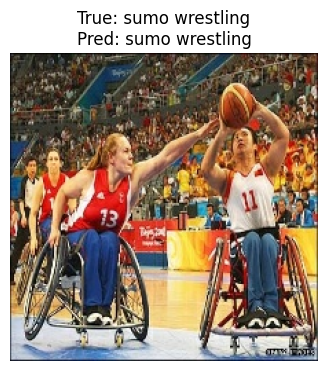

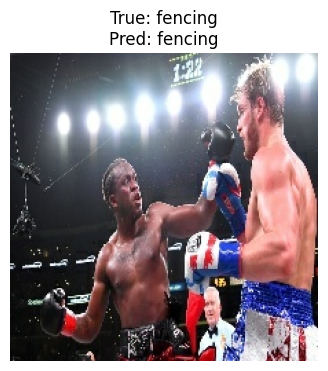

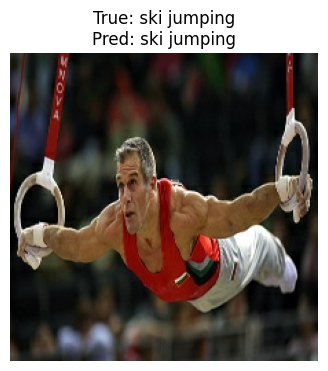

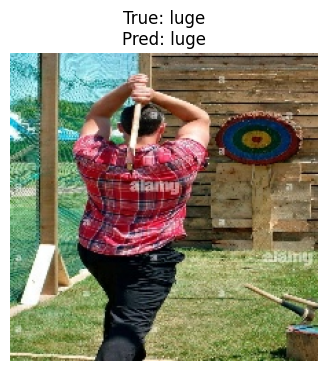

In [12]:
import numpy as np

images, labels = next(iter(test_dataset))

predicted_classes = model.predict(images)

true_classes = np.argmax(labels.numpy(), axis=1)
predicted_classes = np.argmax(predicted_classes, axis=1)

for i in range(5):
    img = images[i].numpy()
    img = np.astype(img, "uint8")
    true_label = true_classes[i]
    pred_label = predicted_classes[i]

    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}")
    plt.axis('off')
    plt.show()